In [2]:
'''
In this we are trying to predict if the loan will be approved or not

'''

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
 

In [3]:
data= pd.read_csv('train.csv')

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
encode = LabelEncoder()
data.Loan_Status =  encode.fit_transform(data.Loan_Status)


In [6]:
data.dropna(how='any', inplace = True)

#look at the method details below

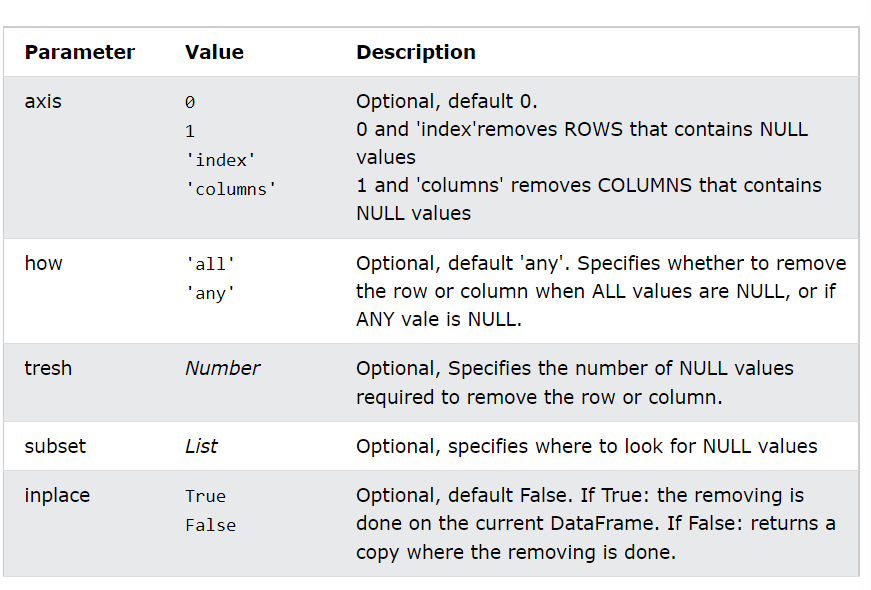

In [8]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

train_x = train.drop(columns= ['Loan_ID', 'Loan_Status'], axis=1)
train_y =  train['Loan_Status']

test_x = test.drop(columns= ['Loan_ID', 'Loan_Status'], axis=1)
test_y =  test['Loan_Status']

In [11]:
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)


print('shape pf train ', train_x.shape)
print('shaep of test', test_x.shape)

shape pf train  (384, 20)
shaep of test (96, 20)


In [12]:
model = LogisticRegression()

model.fit(train_x, train_y)



c:\Users\Akarsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
predict = model.predict(test_x)

print('the predicted values are', predict)

print(accuracy_score(test_y, predict))

the predicted values are [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1]
0.7291666666666666
